<h1><center>
    ECE 438: Digital Signal Processing with Applications<br/>
    Lab 3: Frequency Analysis<br/>
    <small>Date: 9/10/24 </small><br/>
    <small>Section: 001 </small><br>
</center></h1>

|Name |Signature |Time spent outside lab|
|:---:|:---:|:---:|
|Amirzhan Mukhametkarim [---%]| AM | 8 |
|Student Name #2 [---%]| | |

||Below expectations| Lacks in some respect|Meets all expectations|
|:---:|:---:|:---:|:---:|
|**Completeness of the report**||||
|**Organization of the report**||||
|**Quality of figures**: *Correctly labeled with title, x-axis, y-axis, and name(s)*||||
|**Ability to compute Fourier series expansion and synthesize periodic signals using the expansion in Simulink (26 pts)**: *Derivation and sketch, plots of synthesized signals, questions*||||
|**Understanding of modulator and CT system analysis (26 pts)**: *Output plots, questions*||||
|**Implementation of DTFT (21 pts)**: *Python function, DTFT’s magnitude and phase plots*||||
|**DT system analysis (27 pts)**: *Exercises in 5.2, completed block diagram, table of measurements, impulse and frequency response*||||

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# make sure the plot is displayed in this notebook
%matplotlib inline
# specify the size of the plot
plt.rcParams['figure.figsize'] = (16, 6)

# for auto-reloading extenrnal modules
%load_ext autoreload
%autoreload 2

<h3 style="color:red;"><left>Exercise 2.1</left></h3>

**1. For each of these two signals, do the following on a blank sheet of paper (or type the equations in the Markdown cell if you are familiar with LaTex):**
* **Compute the Fourier series expansion in the form**
\begin{equation}
    s(t)=a_0+\sum_{k=1}^\infty A_k\sin(2\pi kf_0t+\theta_k)
\end{equation}
where $f_0=\frac{1}{T_0}$.

    **Hint :**You may want to use one of the following references:

    Sec. 4.1 of “Digital Signal Processing”, by Proakis and Manolakis, 1996;

    Sec. 4.2 of “Signals and Systems”, by A. Oppenheim and A. Willsky, 1983;

    Sec. 3.3 of “Signals and Systems”, A. Oppenheim and A. Willsky, 1997.

    Note that in the expression above, the function in the summation is $\sin(2\pi kf_0 t + \theta k )$, rather than a complex sinusoid. The formulas in the above references must be modified to accommodate this. You can compute the cos/sin version of the Fourier series, then convert the coefficients.

![title](2.1.png)

**2. Write code to approximate the two signals using the Fourier series expansion above. Use 200 (instead of infinite number of) Sine waves. Then, plot these two signals.**

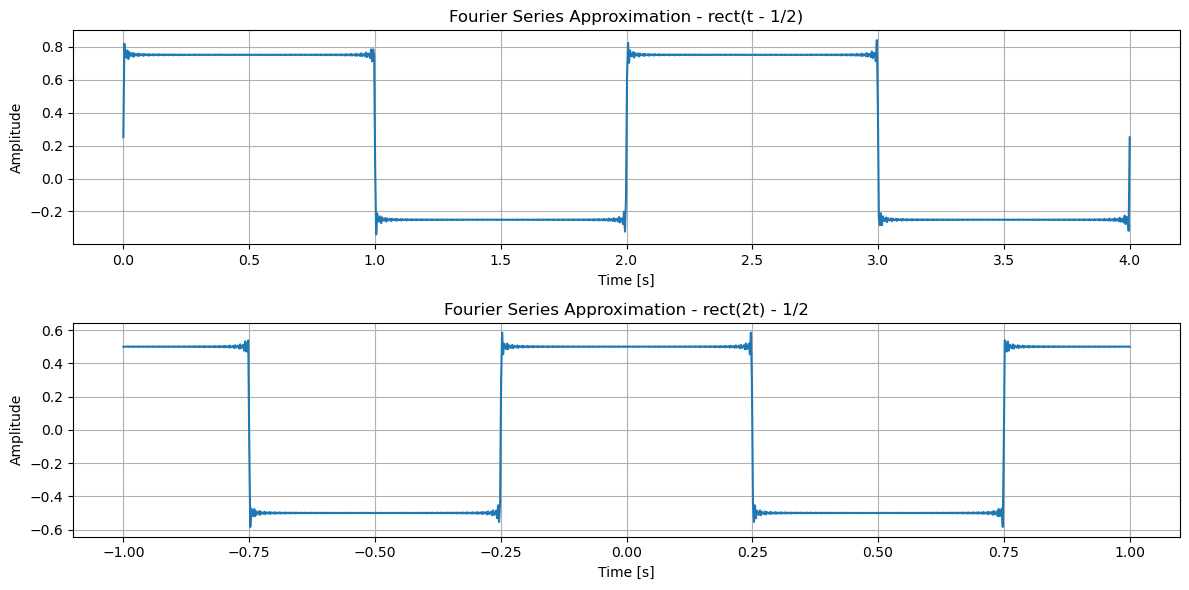

In [38]:
# write your code here
def fourier_series(t, T0, N, shift):
    f0 = 1 / T0
    s = np.zeros_like(t)
    a0 = 1 / T0
    s += a0 / 2
    
    for k in range(1, N+1):
        Ak = 2 / (np.pi * k) * np.sin(np.pi * k / 2)
        s += Ak * np.cos(2 * np.pi * k * f0 * (t - shift))
    
    return s

T0_1 = 2
T0_2 = 1 
N_harmonics = 200
t1 = np.linspace(0, 2 * T0_1, 1000)
t2 = np.linspace(-T0_2, T0_2, 1000)

rect_approx_1 = fourier_series(t1, T0_1, N_harmonics, shift = 0.5)
rect_approx_2 = fourier_series(t2, T0_2, N_harmonics, shift = 0) - 0.5

plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(t1, rect_approx_1)
plt.title('Fourier Series Approximation - rect(t - 1/2)')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)

# Plot the second rectangular signal
plt.subplot(2, 1, 2)
plt.plot(t2, rect_approx_2)
plt.title('Fourier Series Approximation - rect(2t) - 1/2')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)

plt.tight_layout()
plt.show()

<h3 style="color:red;"><left>Exercise 4.1</left></h3>

**1. Hand in plots of the Spectrum Analyzer output for each of the three synthesized waveforms.** 

![title](4.1.1.png)
![title](4.1.2.png)
![title](4.1.3.png)

**2. For each case in Q1, comment on how the synthesized waveform differs from the desired signal,and on the structure of the spectral density.**

They all differ in frequency and peak value for spectral density plot

<h3 style="color:red;"><left>Exercise 4.2</left></h3>

**1. Hand in plots of the output of the *Spectrum Analyzer* for each signal.**

![title](4.2.1.png)
![title](4.2.2.png)
![title](4.2.3.png)
![title](4.2.4.png)


**2. What effect does changing the modulating frequency have on the spectral density?**

Increases the space between spectral components.

**3. Why does the spectrum have a comb structure and what is the spectral distance between impulses? Why?**

Because the signal is periodic.

**4. What would happen to the spectral density if the period of the triangle pulse were to
increase toward infinity? (in the limit)**  

It just going to smooth out and will look like a single pulse instead of pulse with disctinct peaks. 

<h3 style="color:red;"><left>Exercise 4.3</left></h3>

**1. Hand in the printout of the output of the Network Analyzer (magnitude and phase of the
frequency response, and the impulse response).**

![title](4.3.1.png)

**2. Hand in the plot of the impulse response obtained using a unit step.**

![title](4.3.2.png)

**3. What are the advantages and disadvantages of each method?**

Advantages of network analyzer method:
Provides accurate frequency response (magnitude and phase).
Automatically computes transfer function.

Disadvatages:
Uses Fourier transform.
Complex systems take longer.


Advantages of unit step input method:
Directly measures impulse response.
Simpler and faster setup.

Disadvantages:
No frequency response information.
Derivative computation sensitive to noise.

<h3 style="color:red;"><left>Exercise 5.1</left></h3>

**1. Complete the follwing function that computes the DTFT of a discrete-time signal.** 
```python
def DTFT(x,n0,w):
    """
    This function computes the DTFT of a discrete-time signal.
    
    Parameters
    ---
    x: the discrete-time signal
    n0: time index corresponding to the 1st element of the x vector
    w: frequencies
    
    Returns
    ---
    X: the computed DTFT
    """
    pass
```
**Note that if ```x``` is a vector of length $N$, then its DTFT is computed by**

\begin{equation}
    X(\omega)=\sum_{n=0}^{N-1}x[n]e^{-jw(n+n0)}
\end{equation}

**where $w$ is a vector that contains the frequencies from $-\pi$ to $\pi$.**

**Hint:** In Python, ```1j``` is defined as $\sqrt{-1}$. Use `np.exp(x)` to calculate $e^x$.

In [30]:
# write your code here
def DTFT(x, n0, w):
    N = len(x)
    X = np.zeros(len(w), dtype=complex)
    
    for k, omega in enumerate(w):
        for n in range(N):
            X[k] += x[n] * np.exp(-1j * omega * (n + n0))
    
    return X

**2. For the following signals** 

* $x[n]=\delta[n]$
* $x[n]=\delta[n-5]$
* $x[n]=(0.5)^nu[n]$

**use your DTFT function to compute $X(\omega)$, and plots its magnitude and phase.**

**Hint**: Use `np.power(a,b)` to calculate $a^b$. Use ```np.abs()``` and ```np.angle()``` to compute the magnitude and phase.

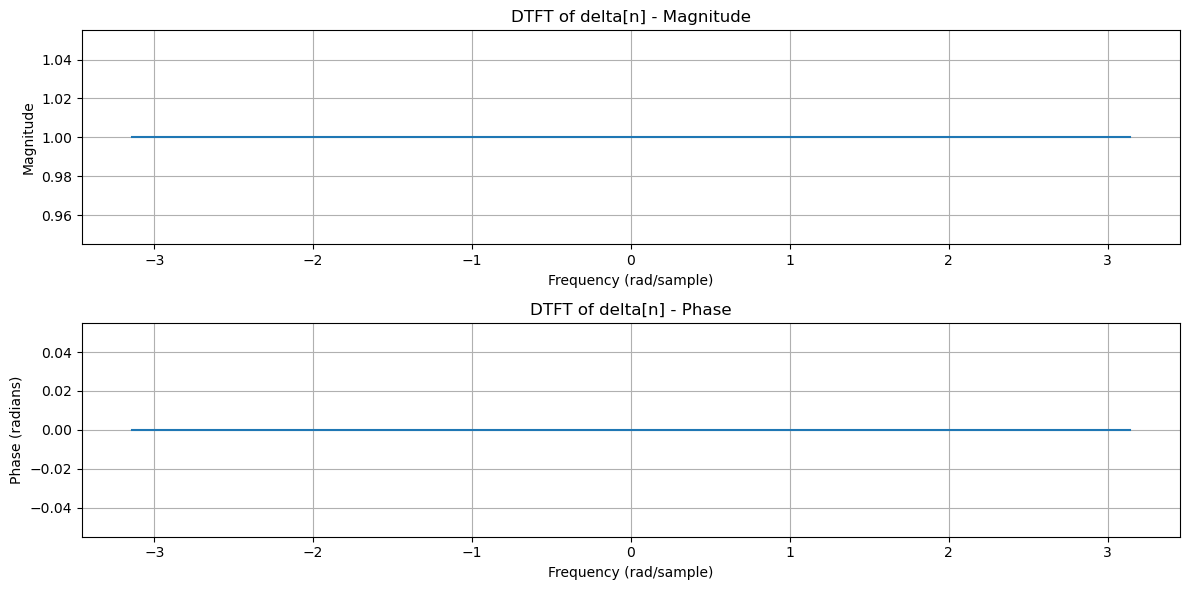

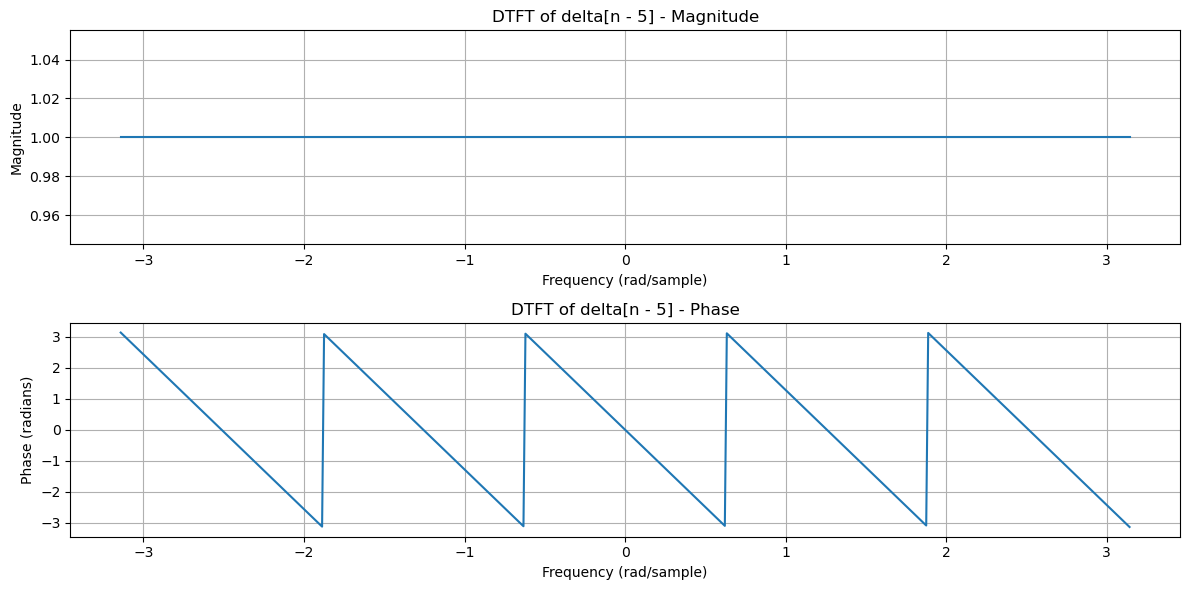

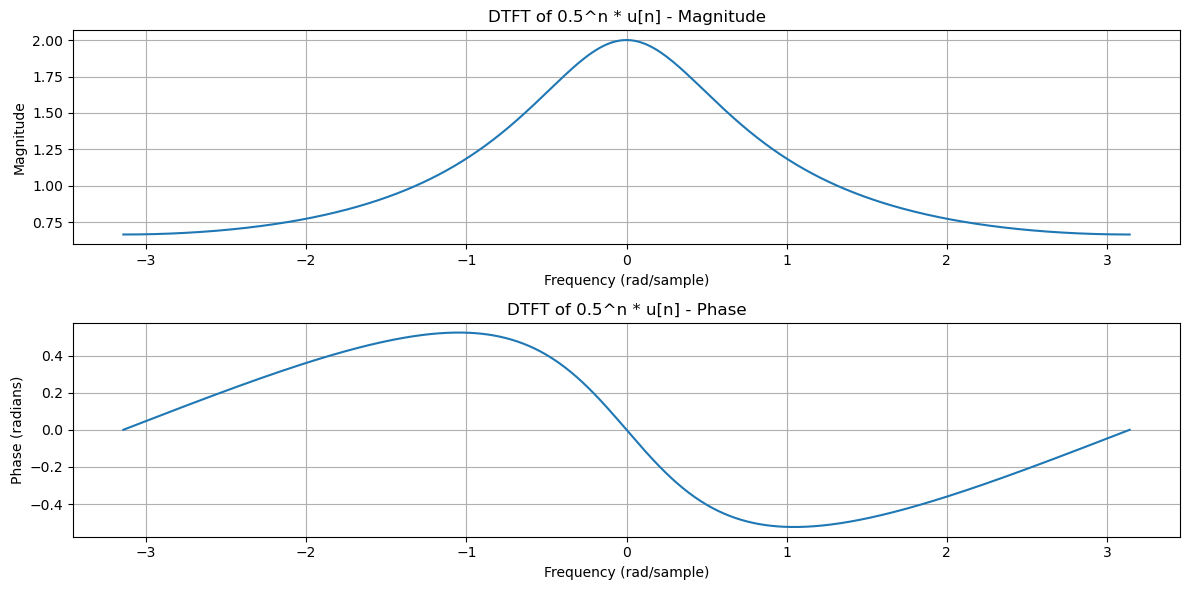

In [25]:
# write your code here
w = np.linspace(-np.pi, np.pi, 512)

def delta(n):
    return np.array([1 if i == 0 else 0 for i in range(n)])

def shifted_delta(n, shift):
    return np.array([1 if i == shift else 0 for i in range(n)])

def unit_step(n):
    return np.array([1 if i >= 0 else 0 for i in range(n)])

x1 = delta(20)
X_w_x1 = DTFT(x1, n0=0, w=w)
x2 = shifted_delta(20, 5)
X_w_x2 = DTFT(x2, n0=0, w=w)

n = np.arange(20)
x3 = (0.5 ** n) * unit_step(20)
X_w_x3 = DTFT(x3, n0=0, w=w)

def plot_magnitude_phase(X_w, w, title):
    magnitude = np.abs(X_w)
    phase = np.angle(X_w)
    
    plt.figure(figsize=(12, 6))
    plt.subplot(2, 1, 1)
    plt.plot(w, magnitude)
    plt.title(f'{title} - Magnitude')
    plt.xlabel('Frequency (rad/sample)')
    plt.ylabel('Magnitude')
    plt.grid(True)

    plt.subplot(2, 1, 2)
    plt.plot(w, phase)
    plt.title(f'{title} - Phase')
    plt.xlabel('Frequency (rad/sample)')
    plt.ylabel('Phase (radians)')
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()

plot_magnitude_phase(X_w_x1, w, "DTFT of delta[n]")
plot_magnitude_phase(X_w_x2, w, "DTFT of delta[n - 5]")
plot_magnitude_phase(X_w_x3, w, "DTFT of 0.5^n * u[n]")

<h3 style="color:red;"><left>Exercise 5.2: Magnitude and Phase of the Frequency Response of a Discrete-Time Systems</left></h3>

Consider the discrete-time system described by the following difference equation:

\begin{equation}y[n]=0.9y[n-1]+0.3x[n]+0.24x[n-1]\end{equation}

Assume that the system is **causal**.

**1. Draw a system diagram.**

![title](5.2.1.png)

**2. Obtain the impulse response of the system by replacing $x[n]$ with $\delta[n]$ in the above equation. (Use causality to set up the initial conditions.)**

![title](5.2.JPG)

**3. Use your answer in Q2 to obtain the frequency response of the system.**

![title](5.2.JPG)

**4. Find the frequency response of the system using another method. Specifically, take the DTFT of the left-hand-side and right-hand-side of the difference equation, and then use linearity and the time-shifting property of the DTFT along with the fact that $H(\omega)=\frac{Y(\omega)}{X(\omega)}$**

![title](5.2.JPG)

**5. Write Python code to compute and plot the magnitude and phase responses, $|H(\omega)|$ and $\angle H(\omega)$, for $-\pi<\omega<\pi$.**

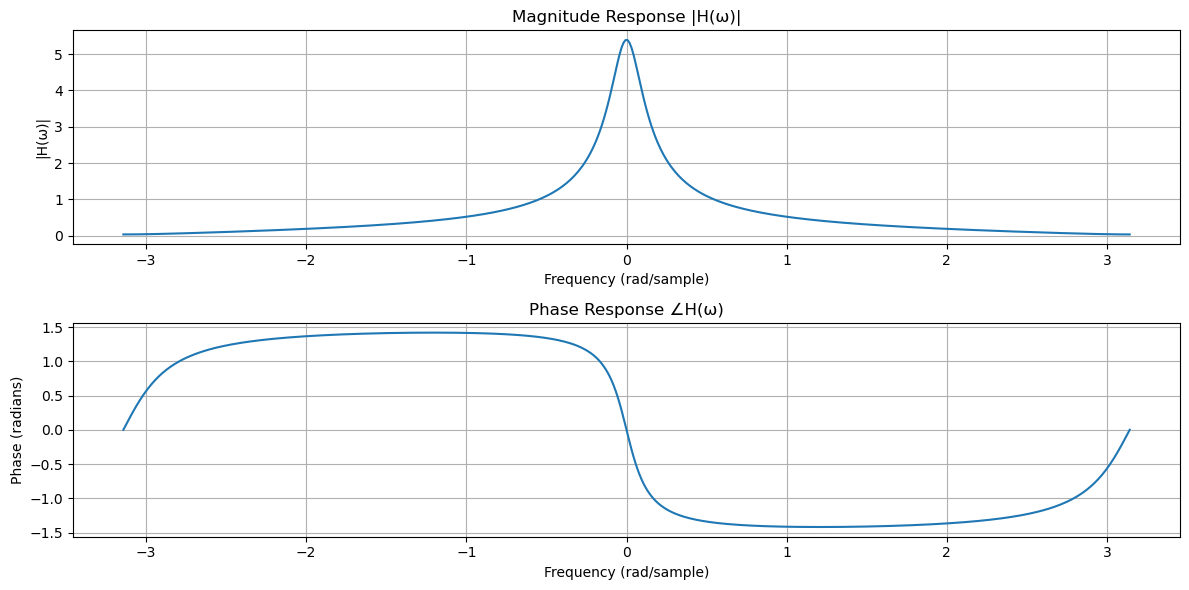

In [31]:
# write your code here
w = np.linspace(-np.pi, np.pi, 512)

def H_omega(w):
    return (0.3 + 0.24 * np.exp(-1j * w)) / (1 - 0.9 * np.exp(-1j * w))

H_w = H_omega(w)
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(w, np.abs(H_w))
plt.title('Magnitude Response |H(ω)|')
plt.xlabel('Frequency (rad/sample)')
plt.ylabel('|H(ω)|')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(w, np.angle(H_w))
plt.title('Phase Response ∠H(ω)')
plt.xlabel('Frequency (rad/sample)')
plt.ylabel('Phase (radians)')
plt.grid(True)

plt.tight_layout()
plt.show()

<h3 style="color:red;"><left>Exercise 5.3</left></h3>

**1. Insert the printout of your completed block diagram.**

![title](5.3.1.png)

**2. Enter both the amplitude measurements you made and their theoretical values.**

| $\omega$ | Measurements | Theoretical Values |
|:--------:|:------------:|:------------------:|
| $\pi/16$ |      0.6        |          0.598          |
|  $\pi/8$ |      0.7        |          0.665          |
|  $\pi/4$ |      1        |          0.973          |

**3. Plot the impulse response, and the magnitude and phase of the frequency response by using your DTFT function.**

<Figure size 1000x400 with 0 Axes>

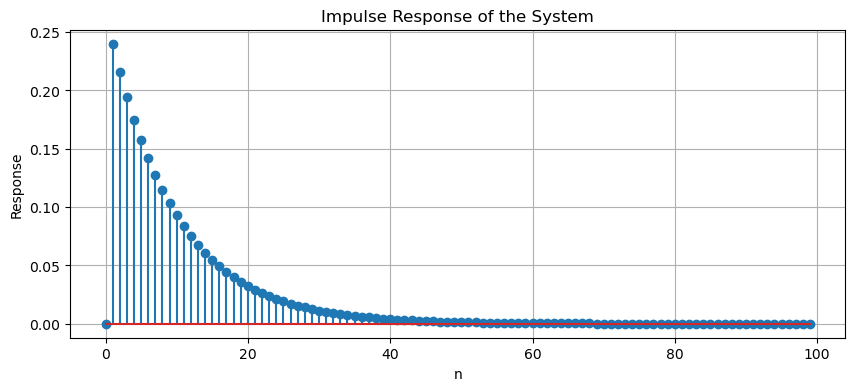

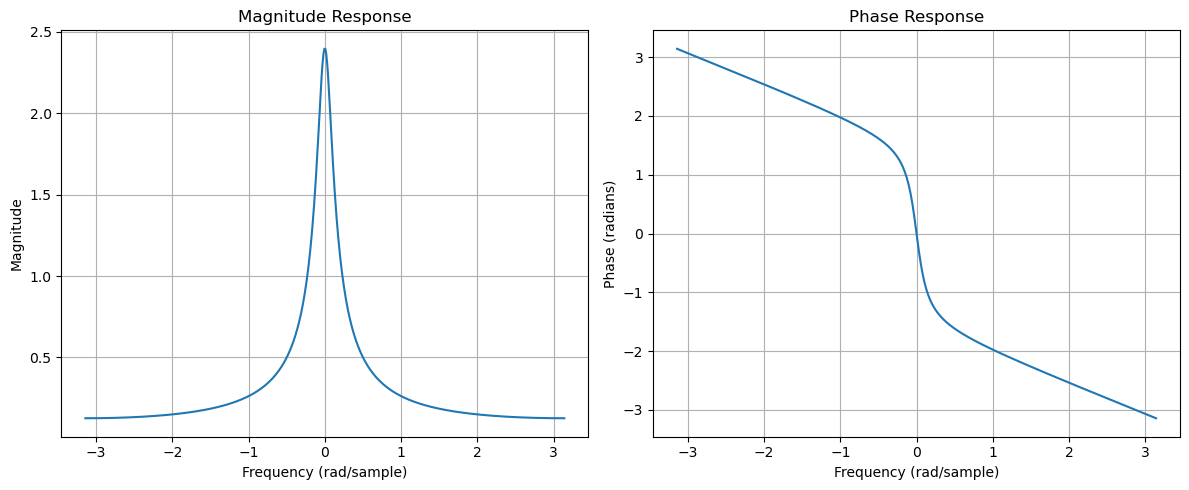

In [28]:
# write your code here
def system_response(x):
    N = len(x)
    y = np.zeros(N)
    for n in range(1, N):
        y[n] = 0.9 * y[n-1] + 0.3 * x[n] + 0.24 * x[n-1]
    return y

N = 100
impulse = np.zeros(N)
impulse[0] = 1

impulse_response = system_response(impulse)
plt.figure(figsize=(10, 4))
plt.stem(impulse_response)
plt.title('Impulse Response of the System')
plt.xlabel('n')
plt.ylabel('Response')
plt.grid(True)
plt.show()
w = np.linspace(-np.pi, np.pi, 512)

frequency_response = DTFT(impulse_response, 0, w)
magnitude = np.abs(frequency_response)
phase = np.angle(frequency_response)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(w, magnitude)
plt.title('Magnitude Response')
plt.xlabel('Frequency (rad/sample)')
plt.ylabel('Magnitude')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(w, phase)
plt.title('Phase Response')
plt.xlabel('Frequency (rad/sample)')
plt.ylabel('Phase (radians)')
plt.grid(True)

plt.tight_layout()
plt.show()
